# Fit the DDM on individual data

## Import the data

In [1]:
from rlssm.utility.load_data import load_example_dataset

data = load_example_dataset(hierarchical_levels=1)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,feedback_type
0,3,1,1,50,41,3,1,1,2.456584,0,0
1,3,1,2,48,34,3,1,2,2.170168,1,0
2,3,1,3,52,46,4,2,1,1.494957,0,0
3,3,1,4,55,48,4,3,2,1.779351,0,0
4,3,1,5,48,52,4,3,3,1.853335,0,0


## Initialize the model

In [2]:
from rlssm.model.models_DDM import DDModel

model = DDModel(hierarchical_levels=1)

Using cached StanModel


## Fit

In [3]:
# sampling parameters
n_warmup = 500
n_sampling = 500
n_chains = 2
n_thin = 1

In [4]:
model_fit = model.fit(
    data,
    thin=n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains=n_chains,
    pointwise_waic=False)

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

## Fit

In [5]:
# sampling parameters
n_warmup = 500
n_sampling = 1500
n_chains = 2
n_thin = 1

In [6]:
model_fit = model.fit(
    data,
    thin=n_thin,
    iter_warmup=n_warmup,
    iter_sampling=n_sampling,
    chains=n_chains,
    pointwise_waic=False)

Fitting the model using the priors:
drift_priors {'mu': 1, 'sd': 5}
threshold_priors {'mu': 0, 'sd': 5}
ndt_priors {'mu': 0, 'sd': 5}


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

                                                                                                                                                                
Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
0 of 3000 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior
0.0 of 3000 iterations ended with a divergence (0.0%)


### get Rhat

In [7]:
model_fit.rhat

,rhat,variable
name,,
lp__,1.002060,lp__
drift,1.000440,drift
threshold,1.001190,threshold
ndt,0.999874,ndt
drift_ll[1],1.000440,drift_ll[1]
...,...,...
log_lik[236],1.000890,log_lik[236]
log_lik[237],0.999597,log_lik[237]
log_lik[238],1.001380,log_lik[238]


### get wAIC

In [8]:
model_fit.waic

{'lppd': -139.18139956067117,
 'p_waic': 3.6955078073836316,
 'waic': 285.7538147361096,
 'waic_se': 32.92392024070494}

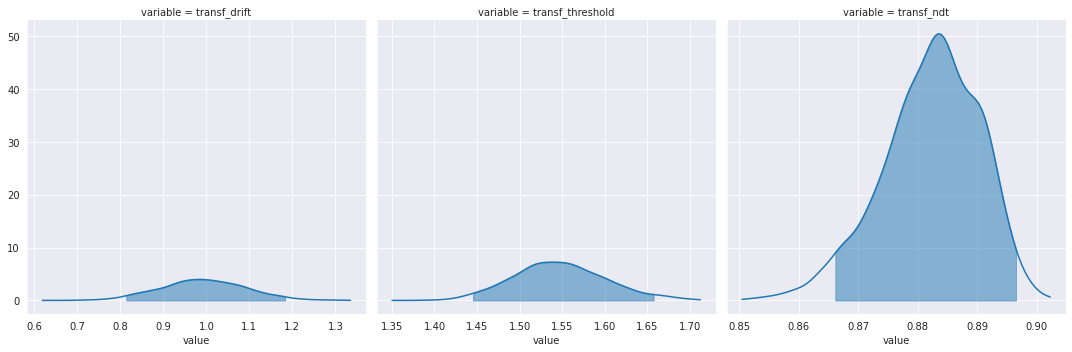

In [9]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05)

In [10]:
model_fit.samples.describe()

,transf_drift,transf_ndt,transf_threshold
count,3000.000000,3000.000000,3000.000000
mean,0.993156,0.882174,1.547798
std,0.099622,0.008184,0.054414
min,0.618427,0.850453,1.350220
25%,0.927934,0.877171,1.511100
50%,0.991904,0.882857,1.545715
75%,1.060670,0.888255,1.583540
max,1.335190,0.902249,1.712580


In [11]:
import seaborn as sns

sns.set(context="talk",
        style="white",
        palette="husl",
        rc={'figure.figsize': (15, 8)})

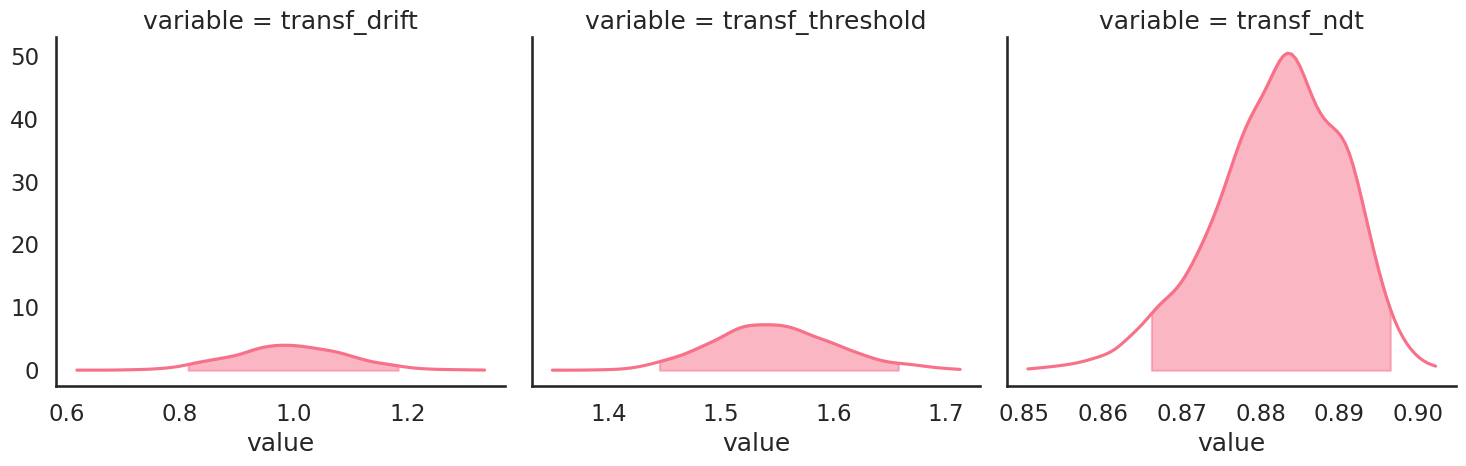

In [12]:
model_fit.plot_posteriors(height=5, show_intervals="HDI", alpha_intervals=.05);

## Posterior predictives

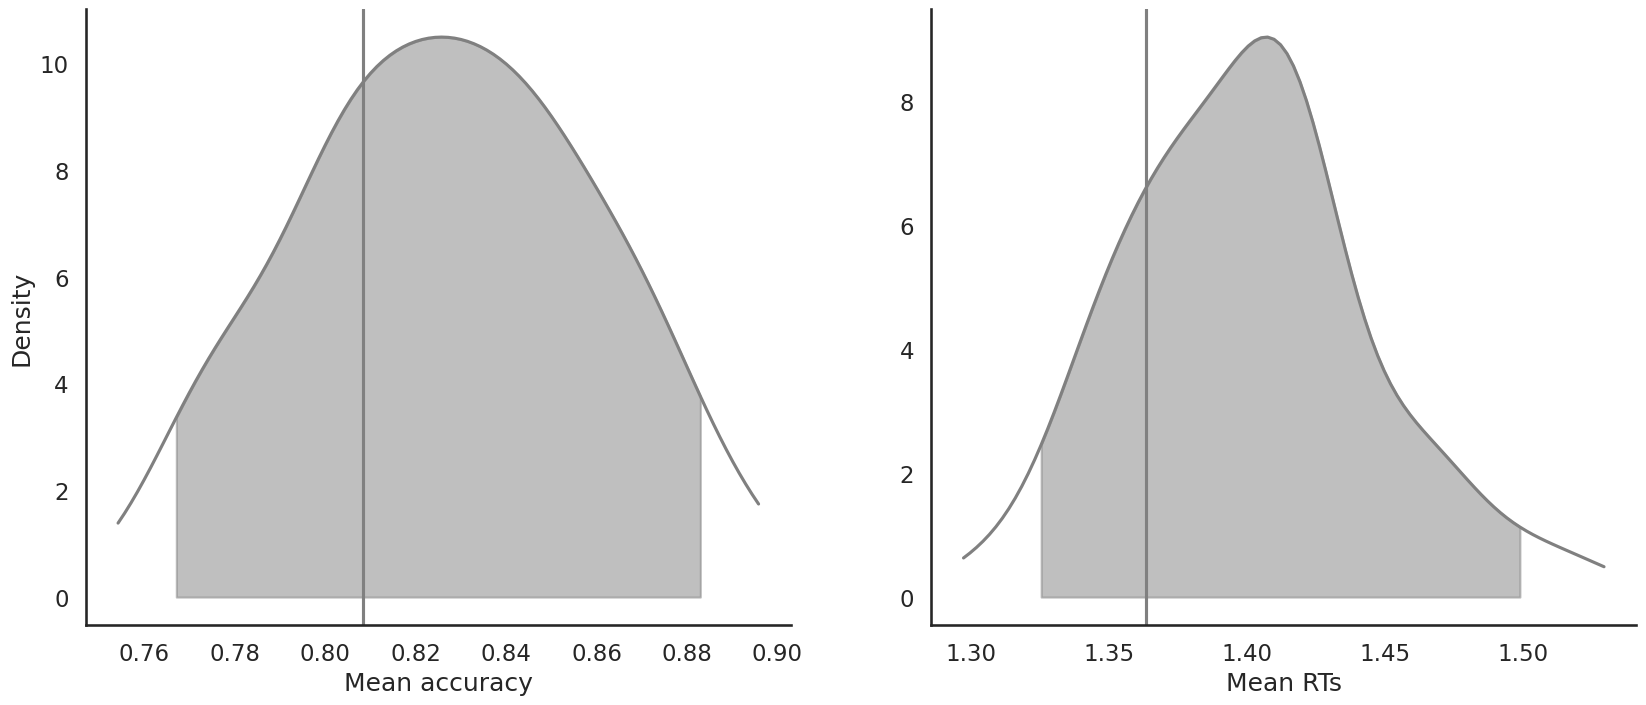

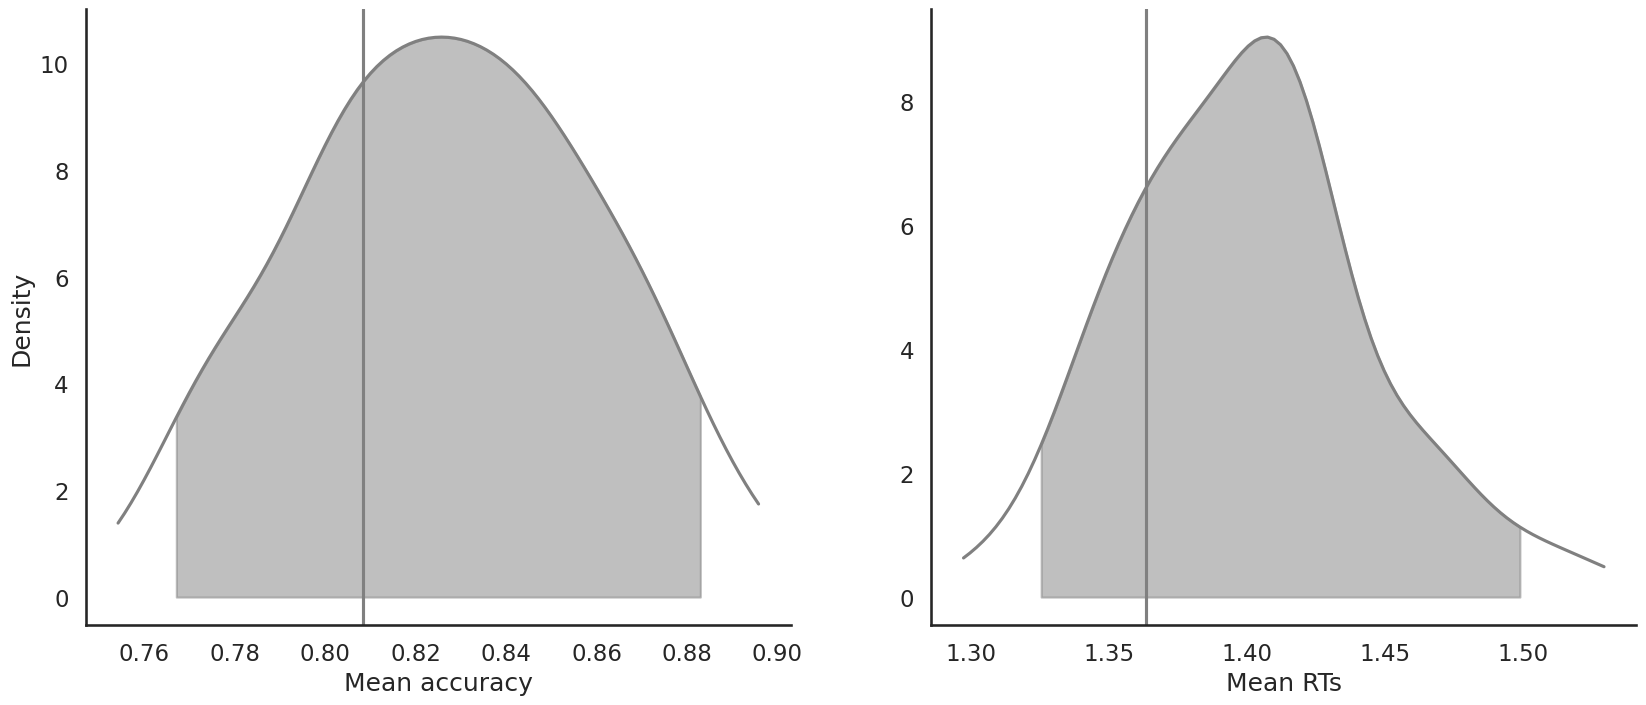

In [13]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20, 8), show_intervals='HDI')

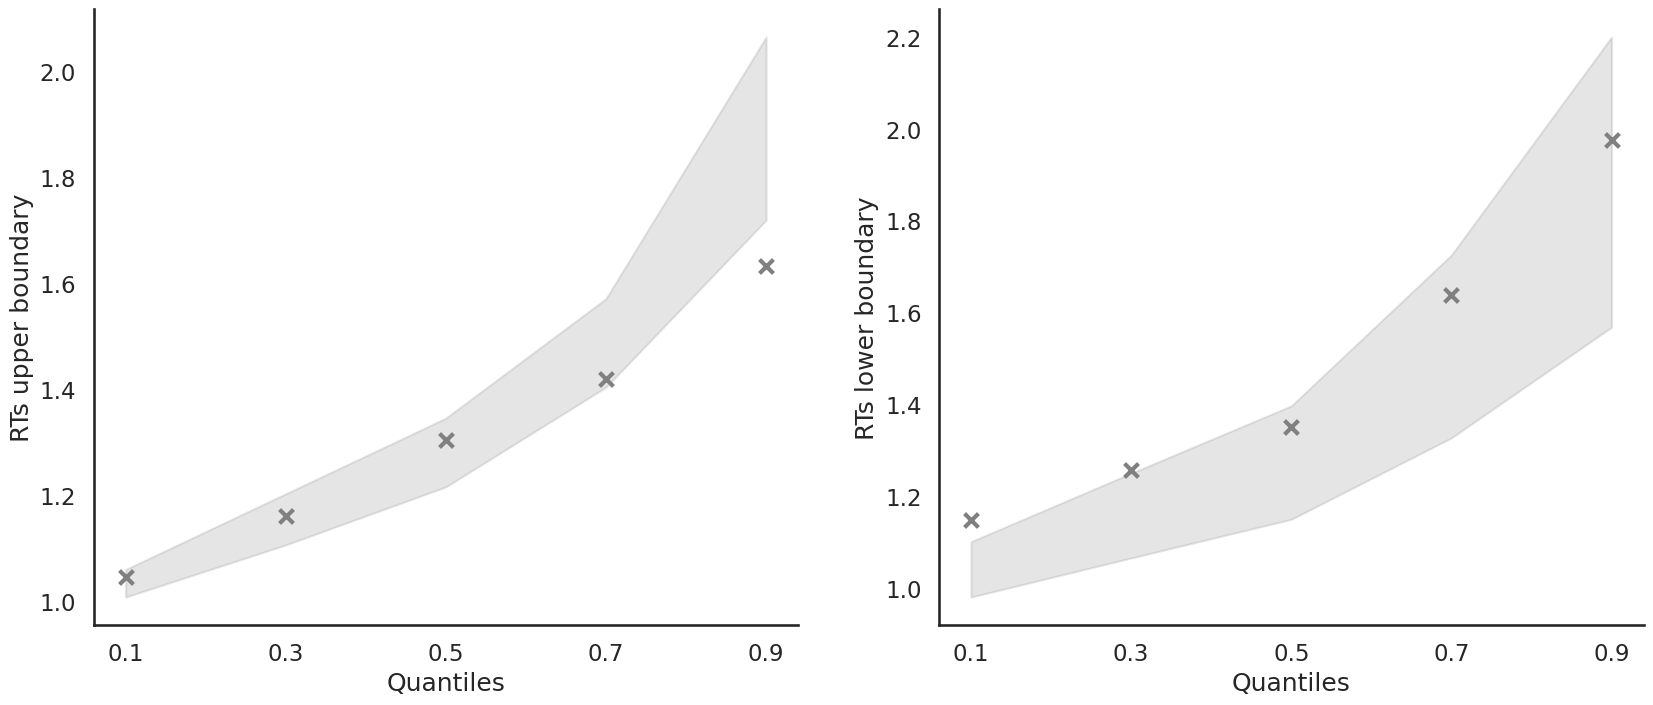

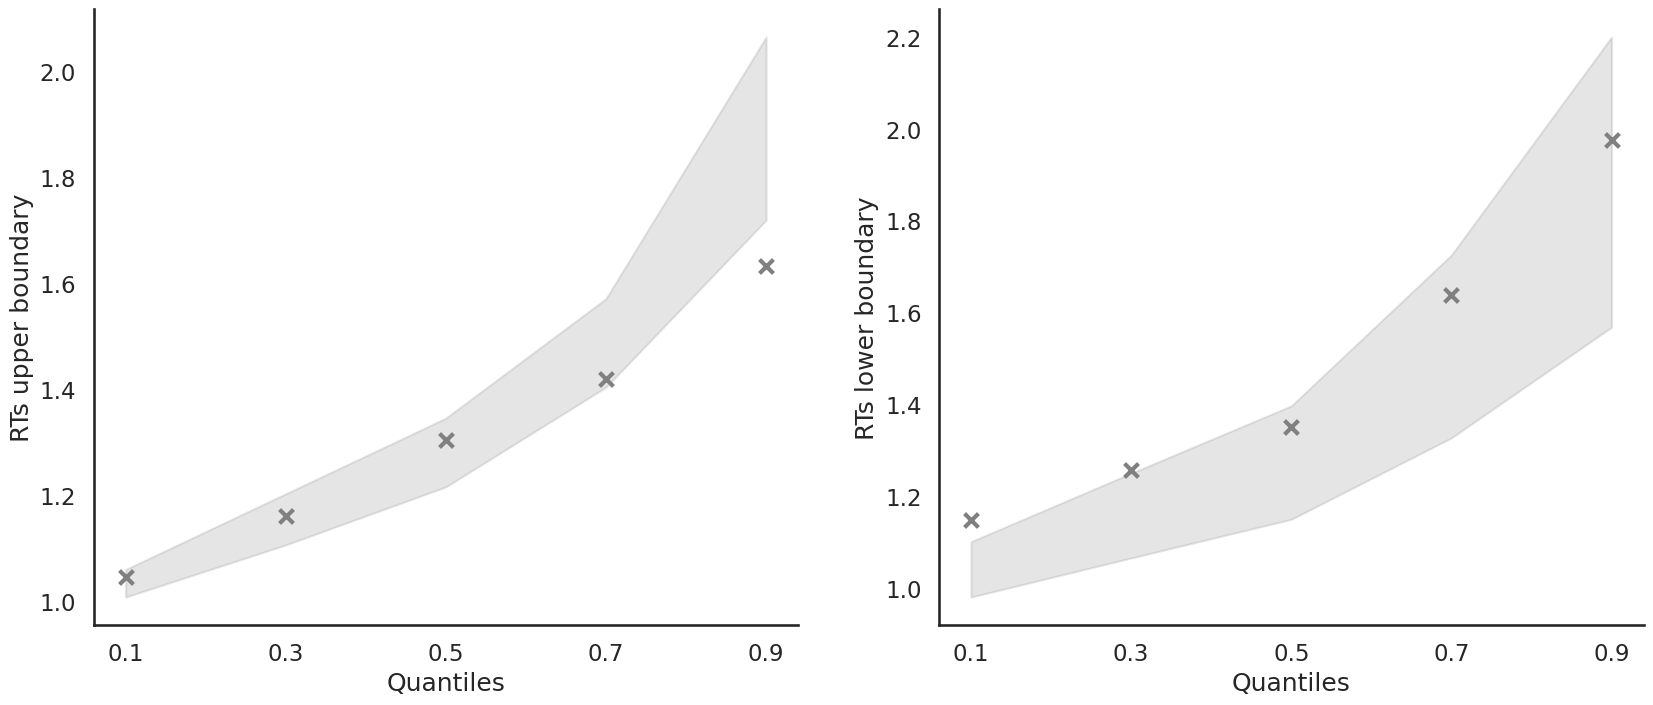

In [14]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades')

In [15]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.887500,1.382798,1.877329,1.018506,1.089906,1.159706,1.345106,1.696106,1.008306,1.109506,1.288706,1.488706,1.958506
2,0.895833,1.406692,1.956740,1.018555,1.120955,1.295355,1.446955,2.232955,1.035955,1.159955,1.284355,1.468955,1.892555
3,0.862500,1.456515,1.897001,1.059786,1.221386,1.299586,1.521786,1.781786,1.028586,1.170386,1.341586,1.544986,2.028186
4,0.841667,1.412847,1.862418,1.034339,1.132739,1.319639,1.418239,1.910639,1.043139,1.167139,1.314139,1.528039,1.941439
5,0.804167,1.376799,2.290501,1.026462,1.134262,1.289862,1.500262,2.059662,1.012062,1.096662,1.219862,1.413662,1.863862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.854167,1.371987,2.565065,1.097050,1.174650,1.215850,1.336450,1.637650,1.054850,1.167650,1.275850,1.465650,1.759450
97,0.837500,1.409335,2.687627,1.052597,1.192597,1.299197,1.460997,1.804397,1.026197,1.155197,1.289197,1.515197,1.867197
98,0.825000,1.396323,2.521695,1.016985,1.177185,1.301685,1.412585,1.891885,1.027685,1.133785,1.272685,1.477785,1.987085


In [16]:
import numpy as np
import pandas as pd

# Define new grouping variables, in this case, for the different choice pairs, but any grouping var can do
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

### Grouped

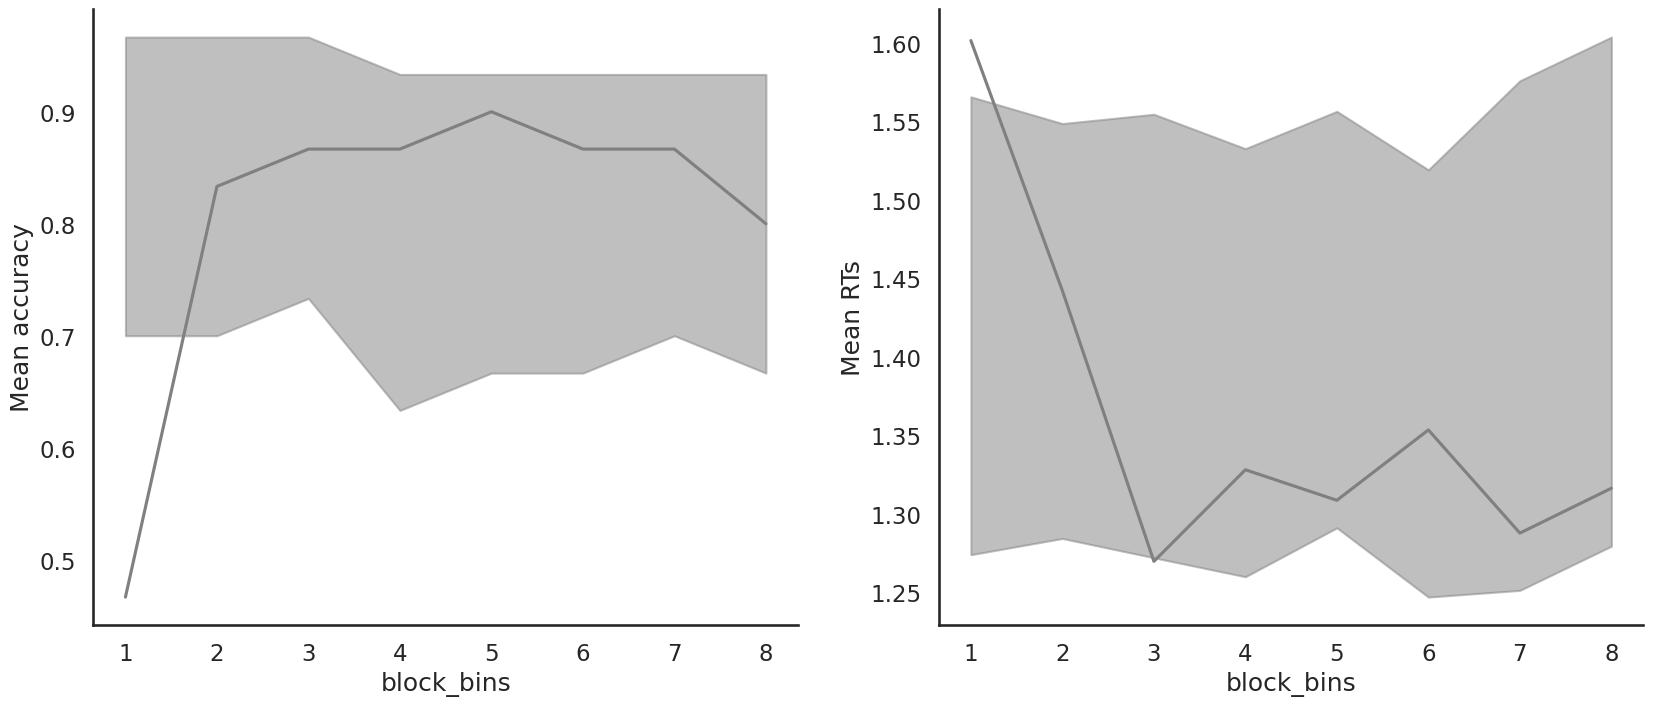

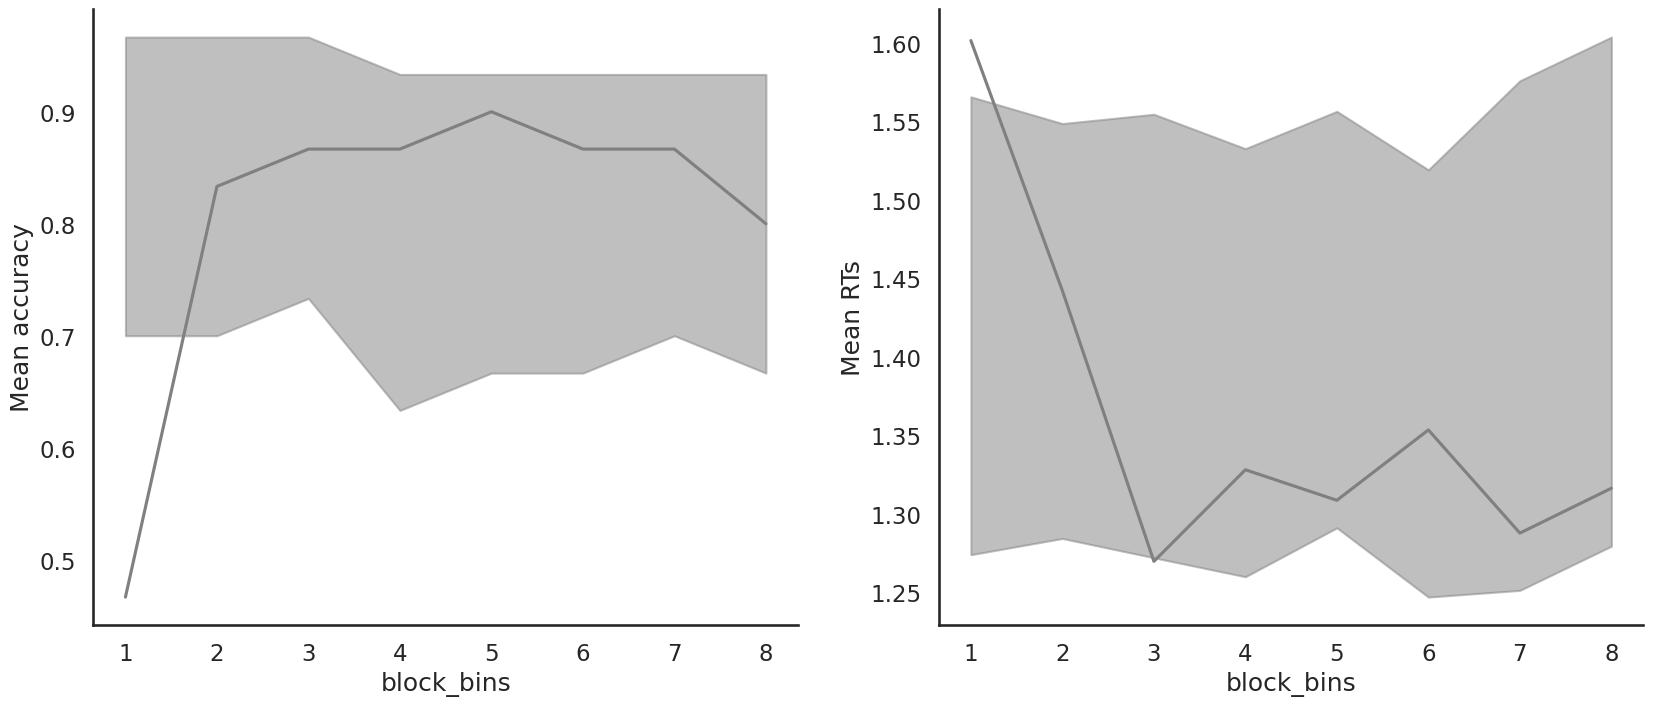

In [17]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'],
                                                  n_posterior_predictives=100,
                                                  figsize=(20, 8))

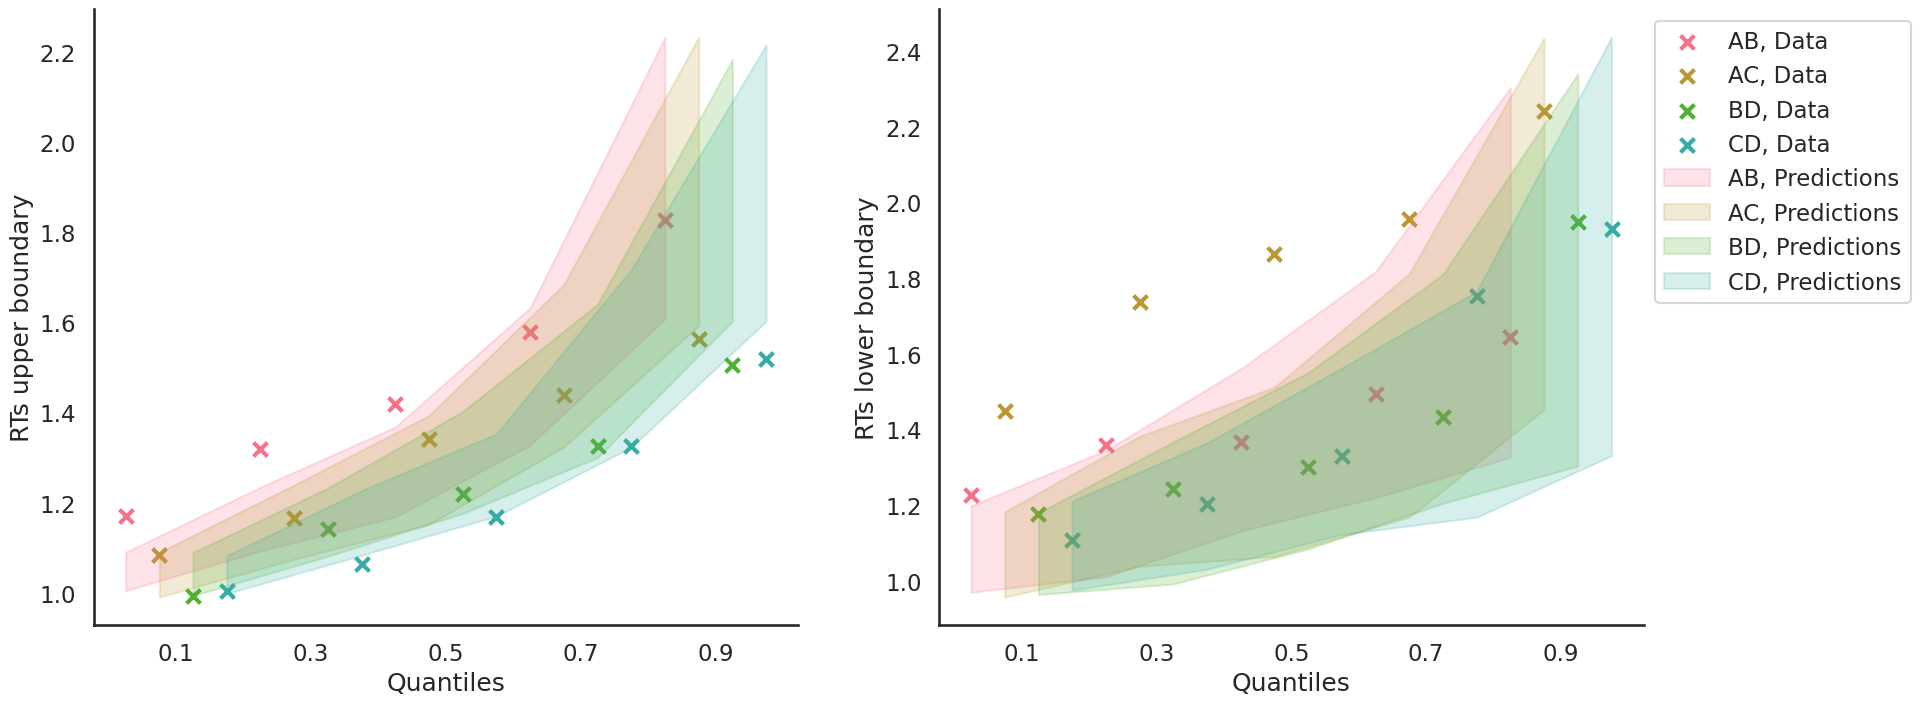

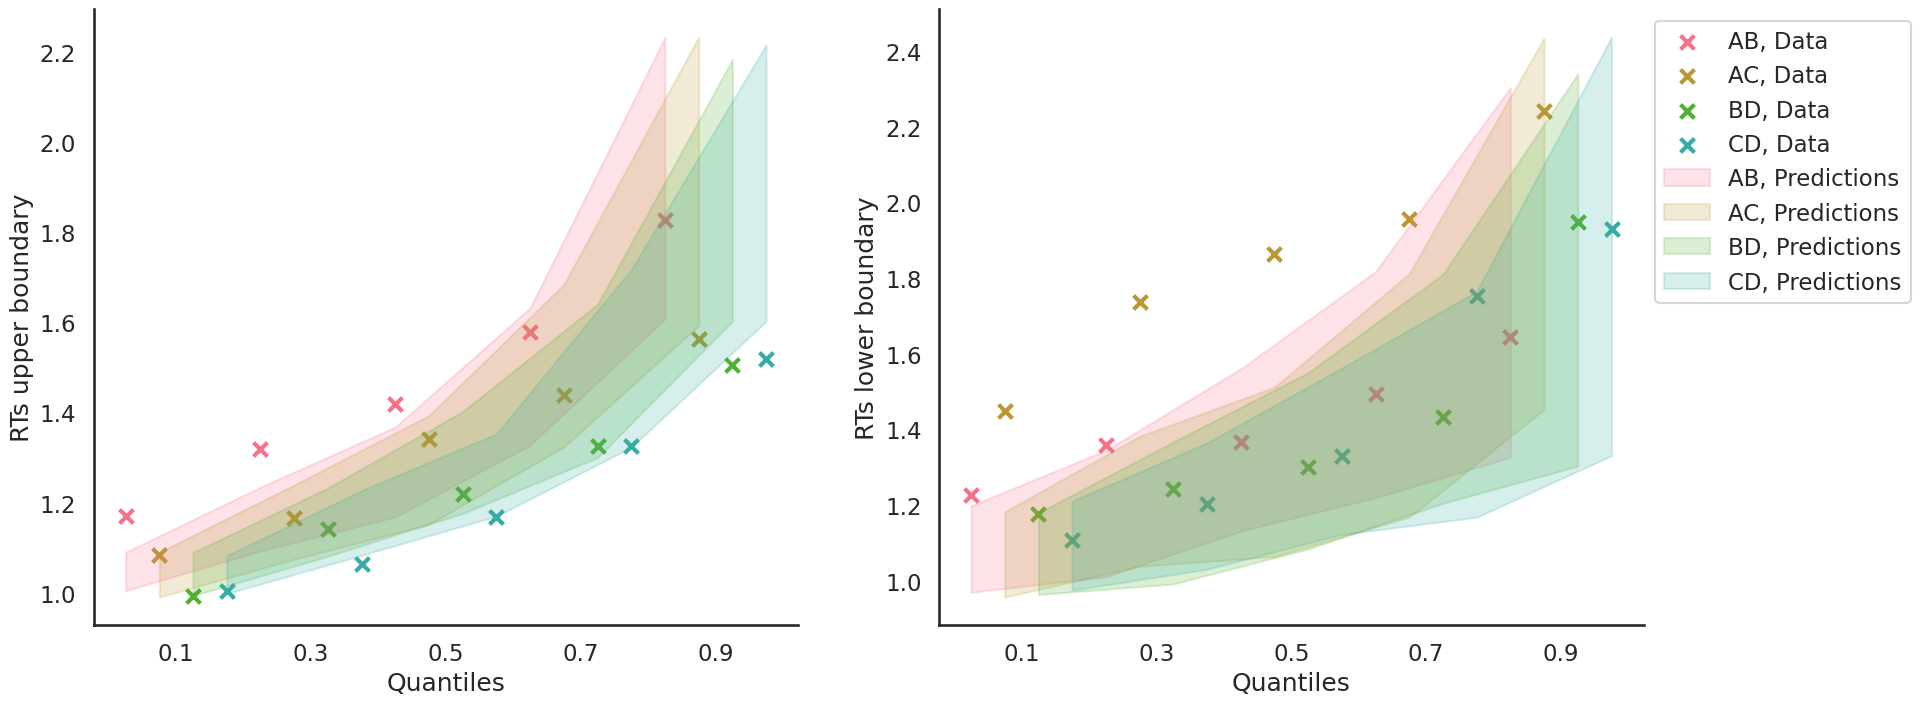

In [18]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9])

In [19]:
model_fit.get_grouped_posterior_predictives_summary(
    grouping_vars=['block_bins'],
    quantiles=[.3, .5, .7],
    n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.966667  1.362906  1.984083         1.566706   
           2            0.900000  1.389988  1.120600         1.187555   
           3            0.833333  1.450586  0.549996         1.103386   
           4            0.866667  1.383772  2.542791         1.154439   
           5            0.766667  1.322162  3.525412         1.096862   
...                          ...       ...       ...              ...   
8          96           0.800000  1.480183  1.028168         1.111350   
           97           0.900000  1.446597  1.187158         1.222597   
           98           0.933333  1.337318  1.460401         0.974885   
           99           0.833333  1.380261  2.457644         1.173161   
           100          0.866667  1.449904  1.223034         1.407437   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.135906         1.566706        1.260706   
           2             1.162955         1.240355        1.235355   
           3             1.045786         1.342586        1.482586   
           4             1.135139         1.170139        1.255639   
           5             1.142462         1.135862        1.178862   
...                           ...              ...             ...   
8          96            1.371650         1.213350        1.508850   
           97            1.167397         1.332197        1.286197   
           98            1.130185         0.989685        1.274185   
           99            1.111161         1.208361        1.222361   
           100           1.159937         1.655437        1.264437   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.566706        1.421306  
           2              1.377155        1.452755  
           3              1.944186        1.635186  
           4              1.190139        1.472639  
           5              1.521662        1.248462  
...                            ...             ...  
8          96             1.401850        1.617950  
           97             1.553397        1.572397  
           98             1.004485        1.454985  
           99             1.489961        1.466761  
           100            1.896737        1.379937  

[800 rows x 9 columns]

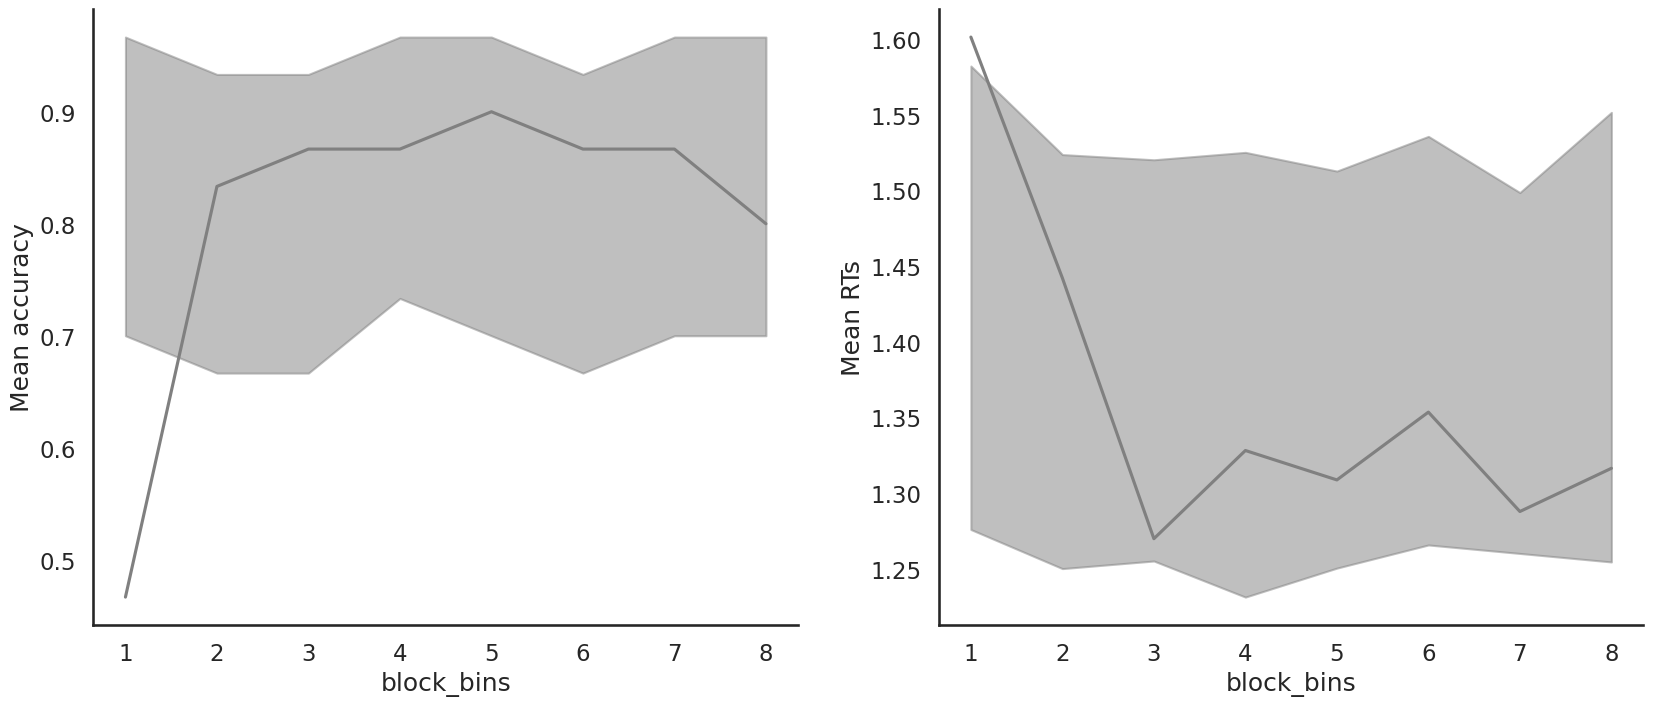

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'],
                                                  n_posterior_predictives=100,
                                                  figsize=(20, 8));

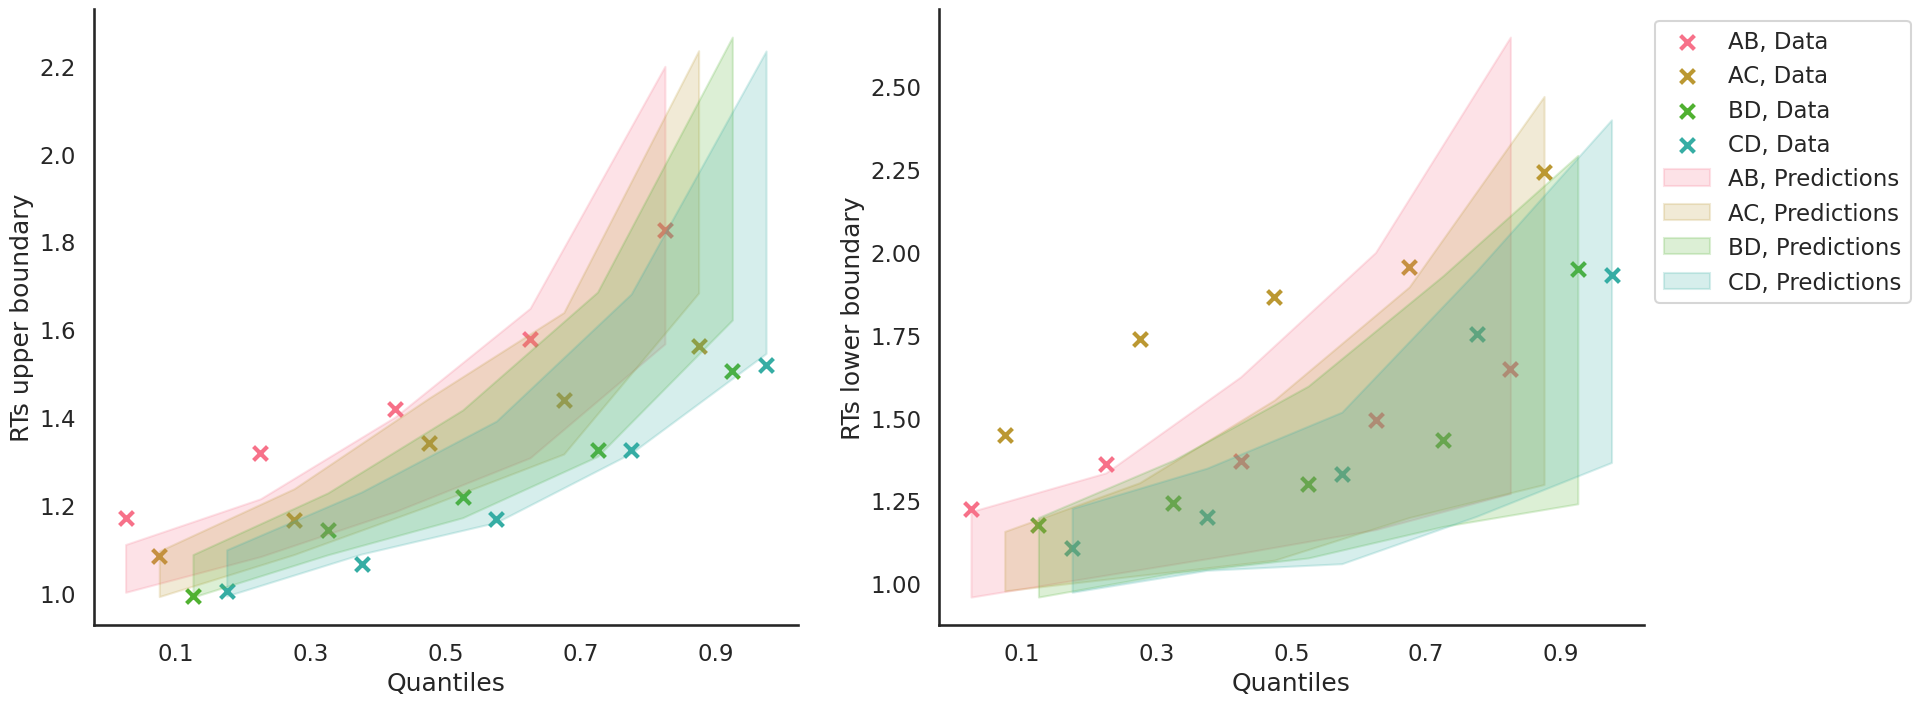

In [21]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);